In [17]:
import retinapy.mea as mea
import numpy as np
import pandas as pd
import json
from collections import defaultdict
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots

In [2]:
np.show_config()

blas_info:
    libraries = ['cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['/home/app/mambaforge/lib']
    include_dirs = ['/home/app/mambaforge/include']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
blas_opt_info:
    define_macros = [('NO_ATLAS_INFO', 1), ('HAVE_CBLAS', None)]
    libraries = ['cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['/home/app/mambaforge/lib']
    include_dirs = ['/home/app/mambaforge/include']
    language = c
lapack_info:
    libraries = ['lapack', 'blas', 'lapack', 'blas']
    library_dirs = ['/home/app/mambaforge/lib']
    language = f77
lapack_opt_info:
    libraries = ['lapack', 'blas', 'lapack', 'blas', 'cblas', 'blas', 'cblas', 'blas']
    library_dirs = ['/home/app/mambaforge/lib']
    language = c
    define_macros = [('NO_ATLAS_INFO', 1), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/app/mambaforge/include']
Supported SIMD extensions in this NumPy install:
    baseline = SSE,SSE2,SSE3
    found = SSSE3,SSE41,POPCNT,SS

In [3]:
# Load recording
rec_name = 'Chicken_17_08_21_Phase_00'
rec = mea.single_3brain_recording(
    rec_name,
    mea.load_stimulus_pattern('../data/ff_noise.h5'),
    mea.load_recorded_stimulus('../data/ff_recorded_noise.pickle'),
    mea.load_response('../data/ff_spike_response.pickle'))
print(rec)

Recording: Chicken_17_08_21_Phase_00, sensor sample rate: 17852.76785 Hz, num samples: 16071532, stimulus pattern shape: (24000, 4),num clusters: 154.


In [48]:
snippets, cluster_ids, sample_rate = mea.labeled_spike_snippets(rec,
                                      snippet_len=120,
                                      snippet_pad=20,
                                      downsample=180)

In [58]:
sample_rate

99.18204361111111

In [73]:
by_cluster = defaultdict(list)
num_13 = 0
for idx in range(len(cluster_ids)):
    by_cluster[cluster_ids[idx]].append(snippets[idx])
    if cluster_ids[idx] == 13:
        num_13 += 1

spike_limit = 19*60*15 # 19 per second
print(spike_limit)
print(len(by_cluster.keys()))
for c_id in set([cluster_ids[i] for i in range(len(cluster_ids))]):
    if len(by_cluster[c_id]) > spike_limit:
        by_cluster.pop(c_id)
print(f'Remaining clusters: {len(by_cluster.keys())}.')
for k,v in by_cluster.items():
    print(len(v), end=', ')

17100
154
Remaining clusters: 151.
5272, 7775, 7630, 5344, 4463, 3343, 3645, 2391, 2361, 3118, 4833, 1723, 1345, 2551, 3142, 3793, 2188, 3060, 1634, 2903, 1599, 2692, 1408, 2987, 1466, 3767, 1043, 981, 884, 1595, 1527, 2802, 734, 472, 2900, 2697, 1167, 1277, 5748, 1192, 944, 1396, 1440, 534, 3953, 308, 311, 1231, 229, 694, 1589, 1019, 304, 564, 930, 309, 1979, 789, 508, 1087, 1803, 1011, 611, 719, 1450, 3746, 295, 293, 19, 1121, 712, 635, 450, 645, 75, 401, 1499, 459, 644, 649, 518, 348, 120, 912, 545, 195, 224, 415, 558, 411, 373, 241, 432, 108, 409, 408, 423, 12, 440, 31, 442, 751, 25, 377, 10, 142, 112, 162, 254, 246, 381, 47, 45, 11, 47, 120, 233, 180, 359, 358, 30, 440, 8, 3, 27, 151, 120, 28, 392, 1, 46, 476, 198, 23, 12, 15, 34, 26, 8, 145, 33, 33, 10, 45, 10, 1, 42, 11, 3, 26, 6, 

In [82]:
len(json.dumps([arr.tolist() for arr in by_cluster[20][0:1000]]))/(2**20)

9.664388656616211

In [87]:
for cluster_id, snippets in by_cluster.items():
    path = f'../out/webdata/{cluster_id}.json'
    with open(path, 'w') as f: 
        max_idx = min(len(by_cluster[cluster_id]), 1000)
        json.dump([arr.tolist() for arr in by_cluster[cluster_id][0:max_idx]], f)

In [35]:
colormap = pd.DataFrame({
    'names':['Red', 'Green', 'UV', 'Blue', 'Stim'],
    'display_hex':['#ff0a0a', '#0aff0a', '#0a0aff', '#303030', '#0a0a0a']})
def kernel_plot(kernel):
    fig = go.Figure()
    xs = np.arange(kernel.shape[0])
    # Shift the x-axis to have zero in the middle.
    for c in range(1,3):
        fig.add_trace(go.Scatter(x=xs, 
                                 y=kernel[:,c], 
                                 line_color=colormap.loc[c]['display_hex'], 
                                 mode='lines'))
    fig.update_layout(autosize=False,
                      height=300,
                      margin=dict(l=1, r=1, b=1, t=25, pad=1),
                      yaxis_fixedrange=True,
                      showlegend=False,
                      title='Kernel',
                      title_x=0.5,
                      title_pad=dict(l=1, r=1, b=10, t=1),
                      xaxis={'title':'time (ms), with spike at 0'},
                      yaxis={'title':'summed responses'} )
    return fig

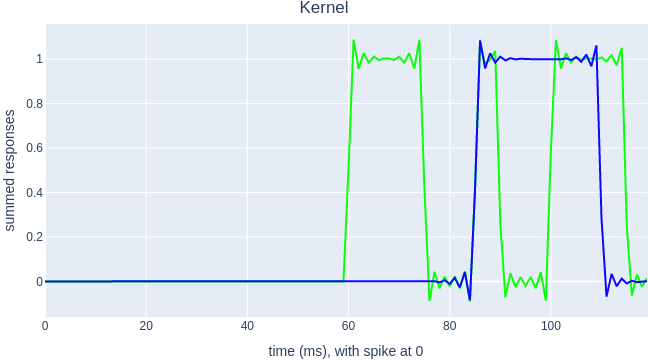

In [36]:
kernel_plot(snippets[7])

In [83]:
len(by_cluster[20])

5272

In [43]:
5272/(60*15)

5.857777777777778